In [198]:
import matplotlib.pyplot as plt
import numpy as np
import logging
import sys
#sys.path.insert(0,'..')
#import utils
#
import matplotlib
plt.style.use('default')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.xmargin'] = 0
#matplotlib.rcParams['axes.ymargin'] = 0
import pickle as pkl
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
cm = 1/2.54  # centimeters in inches

In [181]:
with open(r"vars/logs_1,1,0,0_lr_1e-1_fixed_1_batch_track_penalty.pickle", "rb") as handle:
    logs_1 = pkl.load(handle)
with open(r"vars/logs_1,1,0,0_lr_1e-1_fixed_5_batch_track_penalty.pickle", "rb") as handle:
    logs_2 = pkl.load(handle)
with open(r"vars/logs_1,1,0,0_lr_1e-1_fixed_10_batch_track_penalty.pickle", "rb") as handle:
    logs_3 = pkl.load(handle)
with open(r"vars/logs_1,1,0,0_lr_1e-1_fixed_50_batch_track_penalty.pickle", "rb") as handle:
    logs_4 = pkl.load(handle)
with open(r"vars/logs_1,1,0,0_lr_1e-1_fixed_100_batch_track_penalty.pickle", "rb") as handle:
    logs_5 = pkl.load(handle)
#with open(r"vars/logs_1,05,5,2_lr_1e-1_fixed_10_batch_track_penalty.pickle", "rb") as handle:
#    logs_2 = pkl.load(handle)

In [182]:
entries_to_remove = np.arange(81,200,1)
for k in entries_to_remove:
    logs_1.pop(k, None)
    logs_2.pop(k, None)
    logs_3.pop(k, None)
    logs_4.pop(k, None)
    logs_5.pop(k, None)

In [183]:
# print('Weigths w/o constraints', end=' ')
# print(logs_1[65][4][-1], end=' ')
# print(logs_1[65][5][-1])
# print('Weigths w/ constraints', end=' ')
# print(logs_2[65][4][-1], end=' ')
# print(logs_2[65][5][-1])

In [184]:
lap_labels_1 = [1] + list(np.arange(5,len(logs_1),10))
lap_values_1 = []
lap_labels_2 = [1] + list(np.arange(5,len(logs_2),10))
lap_values_2 = []
lap_labels_3 = [1] + list(np.arange(5,len(logs_3),10))
lap_values_3 = []
lap_labels_4 = [1] + list(np.arange(5,len(logs_4),10))
lap_values_4 = []
lap_labels_5 = [1] + list(np.arange(5,len(logs_5),10))
lap_values_5 = []


steps_1 = np.array([])
delta_1 = np.array([])
X_1 = np.array([[0, 0, 0, 0, 0]])
weights_1 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_1 = np.array([[0, 0, 0, 0]])
stage_cost_1 = np.array([])
#
steps_2 = np.array([])
delta_2 = np.array([])
X_2 = np.array([[0, 0, 0, 0, 0]])
weights_2 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_2 = np.array([[0, 0, 0, 0]])
stage_cost_2 = np.array([])
#
steps_3 = np.array([])
delta_3 = np.array([])
X_3 = np.array([[0, 0, 0, 0, 0]])
weights_3 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_3 = np.array([[0, 0, 0, 0]])
stage_cost_3 = np.array([])
#
steps_4 = np.array([])
delta_4 = np.array([])
X_4 = np.array([[0, 0, 0, 0, 0]])
weights_4 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_4 = np.array([[0, 0, 0, 0]])
stage_cost_4 = np.array([])
#
steps_5 = np.array([])
delta_5 = np.array([])
X_5 = np.array([[0, 0, 0, 0, 0]])
weights_5 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_5 = np.array([[0, 0, 0, 0]])
stage_cost_5 = np.array([])


for key in logs_1.keys():
    if key in lap_labels_1:
        lap_values_1.append(np.array(logs_1[key][0], dtype=int).flatten()[-1])
    steps_1 = np.concatenate((steps_1, np.array(logs_1[key][0], dtype=int).flatten()))
    X_1 = np.concatenate((X_1, np.array(logs_1[key][1].T, dtype=float).reshape(-1,5)))
    delta_1 = np.concatenate((delta_1, np.array(logs_1[key][3], dtype=float).flatten()))
    weights_1 = np.concatenate((weights_1, np.array(logs_1[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_1 = np.concatenate((theta_1, np.array(logs_1[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_1 = np.concatenate((stage_cost_1, np.array(logs_1[key][6], dtype=float).flatten()))
    
for key in logs_2.keys():
    if key in lap_labels_2:
        lap_values_2.append(np.array(logs_2[key][0], dtype=int).flatten()[-1])
    steps_2 = np.concatenate((steps_2, np.array(logs_2[key][0], dtype=int).flatten()))
    X_2 = np.concatenate((X_2, np.array(logs_2[key][1].T, dtype=float).reshape(-1,5)))
    delta_2 = np.concatenate((delta_2, np.array(logs_2[key][3], dtype=float).flatten()))
    weights_2 = np.concatenate((weights_2, np.array(logs_2[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_2 = np.concatenate((theta_2, np.array(logs_2[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_2 = np.concatenate((stage_cost_2, np.array(logs_2[key][6], dtype=float).flatten()))
    
for key in logs_3.keys():
    if key in lap_labels_3:
        lap_values_3.append(np.array(logs_3[key][0], dtype=int).flatten()[-1])
    steps_3 = np.concatenate((steps_3, np.array(logs_3[key][0], dtype=int).flatten()))
    X_3 = np.concatenate((X_3, np.array(logs_3[key][1].T, dtype=float).reshape(-1,5)))
    delta_3 = np.concatenate((delta_3, np.array(logs_3[key][3], dtype=float).flatten()))
    weights_3 = np.concatenate((weights_3, np.array(logs_3[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_3 = np.concatenate((theta_3, np.array(logs_3[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_3 = np.concatenate((stage_cost_3, np.array(logs_3[key][6], dtype=float).flatten()))

for key in logs_4.keys():
    if key in lap_labels_4:
        lap_values_4.append(np.array(logs_4[key][0], dtype=int).flatten()[-1])
    steps_4 = np.concatenate((steps_4, np.array(logs_4[key][0], dtype=int).flatten()))
    X_4 = np.concatenate((X_4, np.array(logs_4[key][1].T, dtype=float).reshape(-1,5)))
    delta_4 = np.concatenate((delta_4, np.array(logs_4[key][3], dtype=float).flatten()))
    weights_4 = np.concatenate((weights_4, np.array(logs_4[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_4 = np.concatenate((theta_4, np.array(logs_4[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_4 = np.concatenate((stage_cost_4, np.array(logs_4[key][6], dtype=float).flatten()))
    
for key in logs_5.keys():
    if key in lap_labels_5:
        lap_values_5.append(np.array(logs_5[key][0], dtype=int).flatten()[-1])
    steps_5 = np.concatenate((steps_5, np.array(logs_5[key][0], dtype=int).flatten()))
    X_5 = np.concatenate((X_5, np.array(logs_5[key][1].T, dtype=float).reshape(-1,5)))
    delta_5 = np.concatenate((delta_5, np.array(logs_5[key][3], dtype=float).flatten()))
    weights_5 = np.concatenate((weights_5, np.array(logs_5[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_5 = np.concatenate((theta_5, np.array(logs_5[key][5], dtype=float).reshape(-1,4)), axis=0)
#     stage_cost_5 = np.concatenate((stage_cost_5, np.array(logs_5[key][6], dtype=float).flatten()))

C:\Users\ricca\AppData\Local\Temp\ipykernel_14948\1058863998.py:57: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost_1 = np.concatenate((stage_cost_1, np.array(logs_1[key][6], dtype=float).flatten()))
C:\Users\ricca\AppData\Local\Temp\ipykernel_14948\1058863998.py:67: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost_2 = np.concatenate((stage_cost_2, np.array(logs_2[key][6], dtype=float).flatten()))
C:\Users\ricca\AppData\Local\Temp\ipykernel_14948\1058863998.py:77: DeprecationWarning: sett

In [185]:
def scale(X):
    max = X.max(axis=0)
    min = X.min(axis=0)
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    return X_std

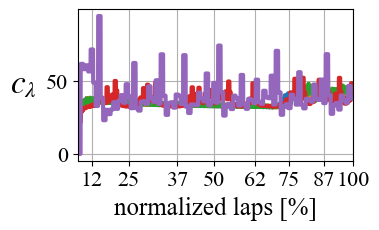

In [219]:
from matplotlib import ticker
fig, ax = plt.subplots(1, 1, figsize=(9 * cm, 5 * cm), dpi=100)
ax.plot(scale(steps_1), theta_1[1:,0], label='w/o constraints', lw=3)
ax.plot(scale(steps_2), theta_2[1:,0], label='w/ constraints', lw=3)
ax.plot(scale(steps_3), theta_3[1:,0], label='w/o constraints', lw=3)
ax.plot(scale(steps_4), theta_4[1:,0], label='w/ constraints', lw=3)
ax.plot(scale(steps_5), theta_5[1:,0], label='w/ constraints', lw=3)
#ax2.legend()
ax.set_xlabel('normalized laps [%]', fontsize=18)
ax.set_ylabel('$c_\lambda$', rotation=0, labelpad=15, fontsize=24)
ax.yaxis.set_label_coords(-.2, .4)
ax.set_xticks(scale(np.array(lap_values_2)))
ax.set_xticklabels(np.int32(scale(np.arange(len(lap_values_2)))*100), fontsize=16)
ax.set_xlim(left=0.001)
#ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.yaxis.get_major_locator().set_params(integer=True)
ax.grid(True)
plt.savefig('training_params_batch_comparison_lambda_norm.eps', format='eps', bbox_inches="tight")
# get handles and labels for reuse
label_params = ax.get_legend_handles_labels()
plt.show()

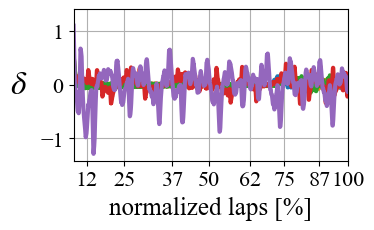

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(9 * cm, 5 * cm), dpi=100)
# ax.plot(steps_1, theta_1[1:,0], label='w/o constraints', lw=3)
# ax.plot(steps_2, theta_2[1:,0], label='w/ constraints', lw=3)
# ax.plot(steps_3, theta_3[1:,0], label='w/o constraints', lw=3)
# ax.plot(steps_4, theta_4[1:,0], label='w/ constraints', lw=3)
# ax.plot(steps_5, theta_5[1:,0], label='w/ constraints', lw=3)
ax.plot(scale(steps_1[:-529]), moving_average(delta_1[30:], 500), label='$N_{batch}=1$', lw=3)
ax.plot(scale(steps_2[:-529]), moving_average(delta_2[30:], 500), label='$N_{batch}=5$', lw=3)
ax.plot(scale(steps_3[:-529]), moving_average(delta_3[30:], 500), label='$N_{batch}=10$', lw=3)
ax.plot(scale(steps_4[:-529]), moving_average(delta_4[30:], 500), label='$N_{batch}=50$', lw=3)
ax.plot(scale(steps_5[:-529]), moving_average(delta_5[30:], 500), label='$N_{batch}=100$', lw=3)
#ax2.legend()
ax.set_xlabel('normalized laps [%]', fontsize=18)
ax.set_ylabel('$\delta$', rotation=0, labelpad=15, fontsize=24)
ax.yaxis.set_label_coords(-.2, .4)
ax.set_xticks(scale(np.array(lap_values_2)))
ax.set_xticklabels(np.int32(scale(np.arange(len(lap_values_2)))*100), fontsize=16)
ax.set_xlim(left=0.001)
ax.grid(True)
plt.savefig('training_params_batch_comparison_delta_norm.eps', format='eps', bbox_inches="tight")
# get handles and labels for reuse
label_params = ax.get_legend_handles_labels()
plt.show()

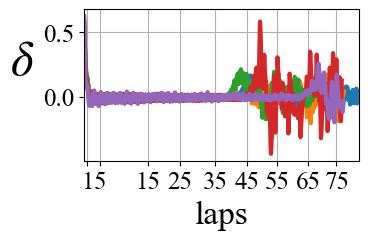

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9 * cm, 5 * cm), dpi=100)
# ax.plot(steps_1, theta_1[1:,0], label='w/o constraints', lw=3)
# ax.plot(steps_2, theta_2[1:,0], label='w/ constraints', lw=3)
# ax.plot(steps_3, theta_3[1:,0], label='w/o constraints', lw=3)
# ax.plot(steps_4, theta_4[1:,0], label='w/ constraints', lw=3)
# ax.plot(steps_5, theta_5[1:,0], label='w/ constraints', lw=3)
ax.plot(moving_average(delta_1[30:], 500), label='$N_{batch}=1$', lw=3)
ax.plot(moving_average(delta_2[30:], 500), label='$N_{batch}=5$', lw=3)
ax.plot(moving_average(delta_3[30:], 500), label='$N_{batch}=10$', lw=3)
ax.plot(moving_average(delta_4[30:], 500), label='$N_{batch}=50$', lw=3)
ax.plot(moving_average(delta_5[30:], 500), label='$N_{batch}=100$', lw=3)
#ax2.legend()
ax.set_xlabel('laps')
ax.set_ylabel('$\delta$', rotation=0, labelpad=15, fontsize=35)
ax.set_xticks(lap_values_2)
ax.set_xticklabels(lap_labels_2)
ax.grid(True)
#plt.savefig('training_params_batch_comparison_delta.eps', format='eps', bbox_inches="tight")
# get handles and labels for reuse
label_params = ax.get_legend_handles_labels()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


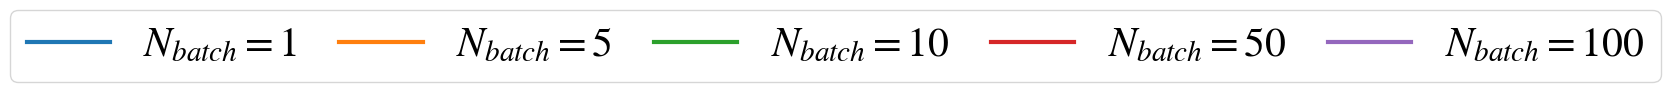

In [77]:
figl, axl = plt.subplots(1, 1, figsize=(9 * cm, 2 * cm), dpi=100)
axl.axis(False)
axl.legend(*label_params, loc="center", ncol=5, columnspacing=1, fontsize=30)#, bbox_to_anchor=(0.5, 0.5))#, prop={"size": 50})
figl.savefig('training_params_batch_comparison_legend_4.eps', format='eps', bbox_inches="tight")

In [9]:
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,constrained_layout=False, figsize=(12, 9), dpi=100)
# #ax1.plot(steps_1, weights_1[1:,0], label='Balanced')
# #ax1.plot(steps_2, weights_2[1:,0], label='Safe Start')
# #ax1.plot(steps_3, weights_3[1:,0], label='Safe Start')
# #ax1.plot(steps_4, weights_4[1:,0], label='Safe Start')
# #ax1.plot(steps_5, weights_5[1:,0], label='Safe Start')
# #ax1.legend()
# #ax1.set_xlabel('laps')
# #ax1.set_ylabel('$Q_1$', rotation=0, labelpad=15, fontsize=25)
# #ax1.set_xticks(lap_values_2)
# #ax1.set_xticklabels(lap_labels_2)
# #ax1.grid(True)
#
# ax1.set_axis_off()
#
# ax2.plot(steps_1, weights_1[1:,1], label='w/o constraints')
# ax2.plot(steps_2, weights_2[1:,1], label='w/ constraints')
# ax2.plot(steps_3, weights_3[1:,1], label='w/o constraints')
# ax2.plot(steps_4, weights_4[1:,1], label='w/ constraints')
# ax2.plot(steps_5, weights_5[1:,1], label='w/ constraints')
# #ax2.legend()
# ax2.set_xlabel('laps')
# ax2.set_ylabel('$Q_2$', rotation=0, labelpad=15, fontsize=25)
# ax2.set_xticks(lap_values_2)
# ax2.set_xticklabels(lap_labels_2)
# ax2.grid(True)
#
# ax3.plot(weights_1[:,2], label='w/o constraints')
# ax3.plot(weights_2[:,2], label='w/ constraints')
# ax3.plot(weights_3[:,2], label='w/o constraints')
# ax3.plot(weights_4[:,2], label='w/ constraints')
# ax3.plot(weights_5[:,2], label='w/ constraints')
# #ax3.legend()
# ax3.grid(True)
# ax3.set_xlabel('laps')
# ax3.set_ylabel('$Q_3$', rotation=0, labelpad=15, fontsize=25)
# ax3.set_xticks(lap_values_2)
# ax3.set_xticklabels(lap_labels_2)
#
# ax4.plot(weights_1[:,5], label='w/o constraints')
# ax4.plot(weights_2[:,5], label='w/ constraints')
# ax4.plot(weights_3[:,5], label='w/o constraints')
# ax4.plot(weights_4[:,5], label='w/ constraints')
# ax4.plot(weights_5[:,5], label='w/ constraints')
# #ax4.legend()
# ax4.grid(True)
# ax4.set_xlabel('laps')
# ax4.set_ylabel('$R$', rotation=0, labelpad=15, fontsize=25)
# ax4.set_xticks(lap_values_2)
# ax4.set_xticklabels(lap_labels_2)
#
# ax5.plot(theta_1[:,0], label='w/o constraints')
# ax5.plot(theta_2[:,0], label='w/ constraints')
# ax5.plot(theta_3[:,0], label='w/o constraints')
# ax5.plot(theta_4[:,0], label='w/ constraints')
# ax5.plot(theta_5[:,0], label='w/ constraints')
# #ax1.plot(np.array(theta_vect).reshape(-1,4)[:,1], label=r'$\theta_{V,1}$')
# #ax1.plot(np.array(theta_vect).reshape(-1,4)[:,2], label=r'$\theta_{V,2}$')
# #ax1.plot(np.array(theta_vect).reshape(-1,4)[:,3], label=r'$\theta_{V,3}$')
# #ax5.legend()
# ax5.set_xlabel('laps')
# ax5.set_ylabel(r'$\lambda$', rotation=0, labelpad=15, fontsize=25)
# ax5.set_xticks(lap_values_2)
# ax5.set_xticklabels(lap_labels_2)
# ax5.grid(True)
#
# ax6.plot(moving_average(delta_1[30:], 500), label='$N_{batch}=1$')
# ax6.plot(moving_average(delta_2[30:], 500), label='$N_{batch}=5$')
# ax6.plot(moving_average(delta_3[30:], 500), label='$N_{batch}=10$')
# ax6.plot(moving_average(delta_4[30:], 500), label='$N_{batch}=50$')
# ax6.plot(moving_average(delta_5[30:], 500), label='$N_{batch}=100$')
# #ax6.legend()
# #ax2.plot(np.array(delta_vect).flatten())
# ax6.grid(True)
# ax6.set_xlabel('laps')
# ax6.set_ylabel(r'$\delta$', rotation=0, labelpad=15, fontsize=25)
# ax6.set_xticks(lap_values_2)
# ax6.set_xticklabels(lap_labels_2)
#
# handles, labels = ax6.get_legend_handles_labels()
# fig.legend(handles, labels, ncol=2, bbox_to_anchor=(.5,0.95), fontsize=20)
#
# plt.tight_layout(pad=0.2)
# plt.savefig('1,1,0,0_training_params_batch_comparison.eps', format='eps', bbox_inches="tight")
# plt.show()

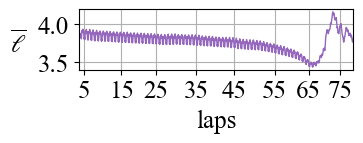

In [44]:
cmap = plt.get_cmap("tab10")
fig, ax = plt.subplots(1, 1, figsize=(9 * cm, 2 * cm), dpi=100)
#fig, ax = plt.subplots(1,1, figsize=(16,3),dpi=100)
ax.plot(steps_5[509:], moving_average(np.array(stage_cost_5[10:]).flatten(), 500), lw=1, label='$N_{batch}=1$', c=cmap(4))
#ax.sharey(ax9)
ax.set_xticks(lap_values_5)
ax.set_xticklabels(lap_labels_5)
ax.grid(True)
ax.set_ylabel('$\overline{\ell}$', rotation=0, fontsize=18)
ax.yaxis.set_label_coords(-.22, .2)
ax.set_xlabel('laps', fontsize=18)
ax.margins(x=0)
#ax.set_xlim(500,11298)
#ax.legend(fontsize=25)
plt.savefig('stage_cost_batch_100_objective_oriented.eps', format='eps', bbox_inches="tight")
#get handles and labels for re use
label_params = ax.get_legend_handles_labels()
plt.show()

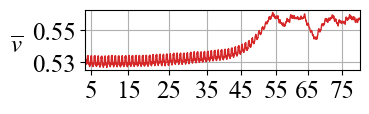

In [52]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1, 1, figsize=(9 * cm, 2 * cm), dpi=100)
#fig, ax = plt.subplots(1,1, figsize=(16,3),dpi=100)
ax.plot(steps_4[509:], moving_average(X_4[11:,3], 500), lw=1, label='$N_{batch}=1$', c=cmap(3))
#ax.sharey(ax9)
ax.set_xticks(lap_values_4)
ax.set_xticklabels(lap_labels_4)
ax.grid(True)
ax.set_ylabel('$\overline{v}$', rotation=0, fontsize=18)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_label_coords(-.25, .2)
#ax.set_xlabel('laps', fontsize=18)
ax.margins(x=0)
#ax.set_xlim(500,11298)
#ax.legend(fontsize=25)
plt.savefig('speed_batch_50_objective_oriented.eps', format='eps', bbox_inches="tight")
#get handles and labels for re use
label_params = ax.get_legend_handles_labels()
plt.show()

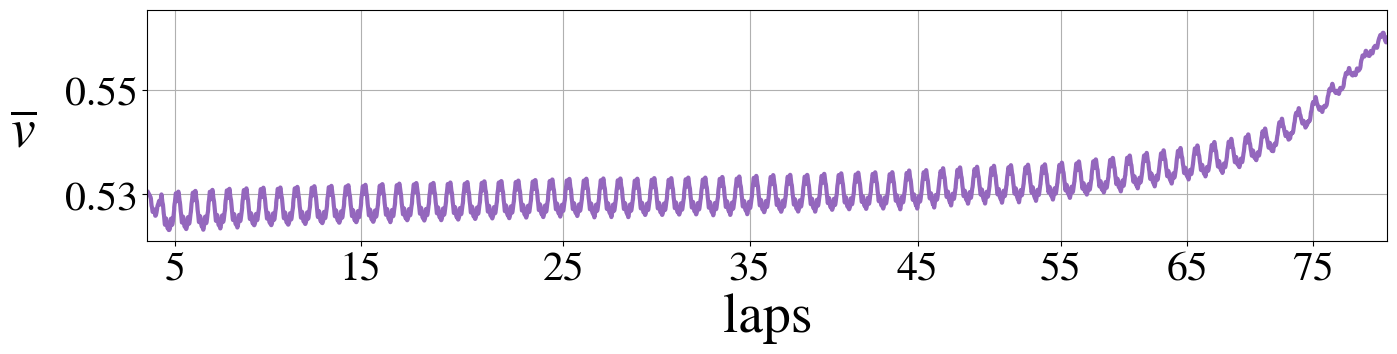

In [42]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1,1, figsize=(16,3),dpi=100)
ax.plot(steps_5[509:], moving_average(X_5[11:,3], 500), label='$N_{batch}=1$', lw=3, c=cmap(4))
#ax.sharey(ax9)
ax.set_xticks(lap_values_3)
ax.set_xticklabels(lap_labels_3)
ax.grid(True)
ax.set_ylabel('$\overline{v}$', rotation=0, fontsize=40)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_label_coords(-.1, .35)
ax.set_xlabel('laps', fontsize=40)
ax.margins(x=0)
ax.set_xlim(500,11298)
#ax.legend(fontsize=25)
plt.savefig('speed_batch_100_performance_driven.eps', format='eps', bbox_inches="tight")
#get handles and labels for reuse
label_params = ax.get_legend_handles_labels()
plt.show()

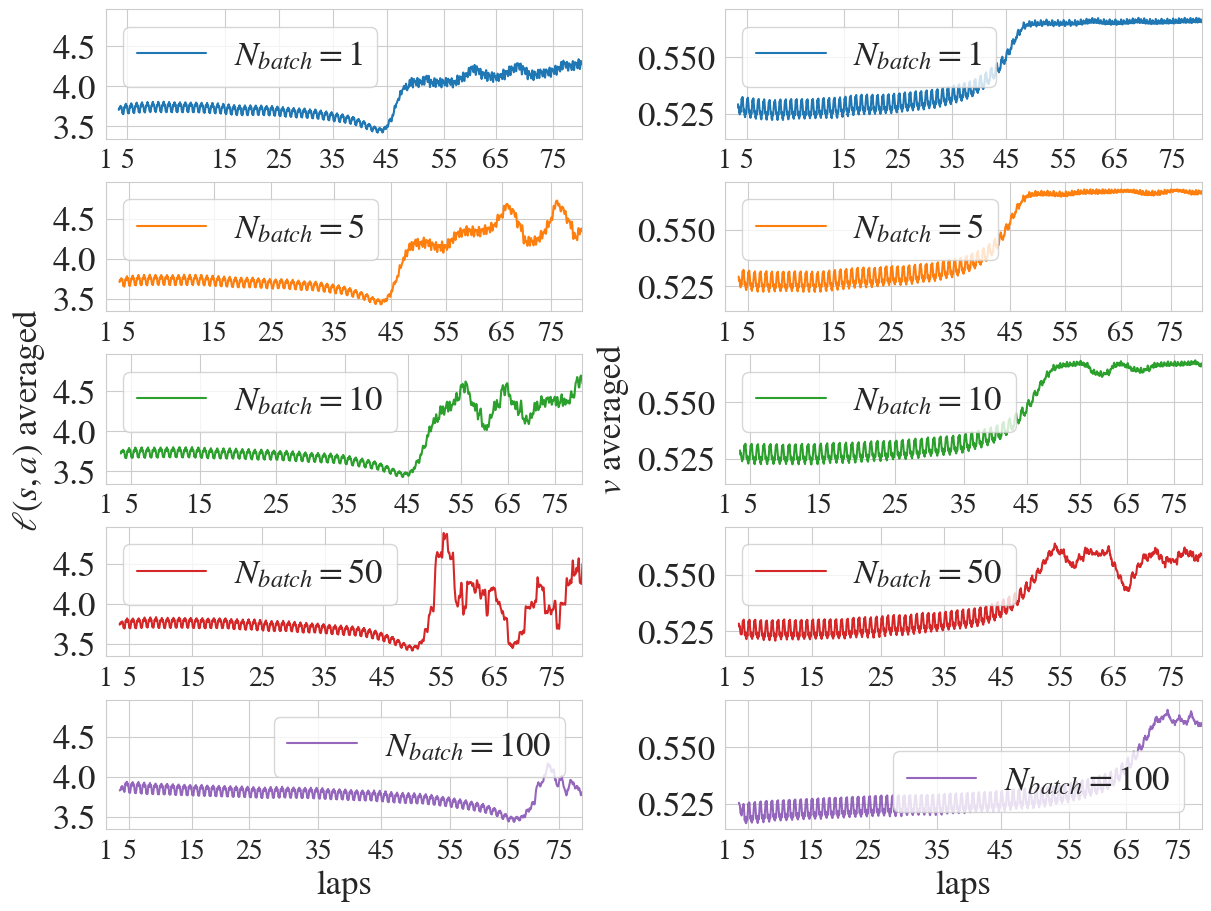

In [7]:
cmap = plt.get_cmap("tab10")

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5,2, figsize=(12,9), dpi=100, constrained_layout=True)

ax1.plot(steps_1[509:], moving_average(np.array(stage_cost_1[10:]).flatten(), 500), label='$N_{batch}=1$', c=cmap(0))
ax1.sharey(ax9)
ax1.set_xticks(lap_values_1)
ax1.set_xticklabels(lap_labels_1)
ax1.grid(True)
ax1.legend(fontsize=25)
#ax1.tick_params(labelbottom=False)
ax3.plot(steps_2[509:], moving_average(np.array(stage_cost_2[10:]).flatten(), 500), label='$N_{batch}=5$', c=cmap(1))
ax3.sharey(ax9)
ax3.set_xticks(lap_values_2)
ax3.set_xticklabels(lap_labels_2)
ax3.grid(True)
ax3.legend(fontsize=25)
#ax3.tick_params(labelbottom=False)
ax5.plot(steps_3[509:], moving_average(np.array(stage_cost_3[10:]).flatten(), 500), label='$N_{batch}=10$', c=cmap(2))
ax5.sharey(ax9)
ax5.set_xticks(lap_values_3)
ax5.set_xticklabels(lap_labels_3)
ax5.grid(True)
ax5.legend(fontsize=25)
#ax5.tick_params(labelbottom=False)
ax7.plot(steps_4[509:], moving_average(np.array(stage_cost_4[10:]).flatten(), 500), label='$N_{batch}=50$', c=cmap(3))
ax7.sharey(ax9)
ax7.set_xticks(lap_values_4)
ax7.set_xticklabels(lap_labels_4)
ax7.grid(True)
ax7.legend(fontsize=25)
#ax7.tick_params(labelbottom=False)
ax9.plot(steps_5[509:], moving_average(np.array(stage_cost_5[10:]).flatten(), 500), label='$N_{batch}=100$', c=cmap(4))
ax9.set_xticks(lap_values_5)
ax9.set_xticklabels(lap_labels_5)
ax9.grid(True)
ax9.legend(fontsize=25, loc='upper right')
#ax9.legend()
ax9.set_xlabel('laps')
ax5.set_ylabel('$\ell(s,a)$ averaged')


ax2.plot(steps_1[509:], moving_average(X_1[11:,3], 500), label='$N_{batch}=1$', c=cmap(0))
ax2.sharey(ax10)
ax2.set_xticks(lap_values_1)
ax2.set_xticklabels(lap_labels_1)
ax2.grid(True)
ax2.legend(fontsize=25)
#ax1.tick_params(labelbottom=False)
ax4.plot(steps_2[509:], moving_average(X_2[11:,3], 500), label='$N_{batch}=5$', c=cmap(1))
ax4.sharey(ax10)
ax4.set_xticks(lap_values_2)
ax4.set_xticklabels(lap_labels_2)
ax4.grid(True)
ax4.legend(fontsize=25)
#ax3.tick_params(labelbottom=False)
ax6.plot(steps_3[509:], moving_average(X_3[11:,3], 500), label='$N_{batch}=10$', c=cmap(2))
ax6.sharey(ax10)
ax6.set_xticks(lap_values_3)
ax6.set_xticklabels(lap_labels_3)
ax6.grid(True)
ax6.legend(fontsize=25)
#ax5.tick_params(labelbottom=False)
ax8.plot(steps_4[509:], moving_average(X_4[11:,3], 500), label='$N_{batch}=50$', c=cmap(3))
ax8.sharey(ax10)
ax8.set_xticks(lap_values_4)
ax8.set_xticklabels(lap_labels_4)
ax8.grid(True)
ax8.legend(fontsize=25)
#ax7.tick_params(labelbottom=False)
ax10.plot(steps_5[509:], moving_average(X_5[11:,3], 500), label='$N_{batch}=100$', c=cmap(4))
ax10.set_xticks(lap_values_5)
ax10.set_xticklabels(lap_labels_5)
ax10.grid(True)
ax10.legend(fontsize=25, loc='lower right')
#ax9.legend()
ax10.set_xlabel('laps')
ax6.set_ylabel('$v$ averaged')

#ax2.plot(steps_1[509:], moving_average(X_1[11:,3], 500), label='Balanced')
#ax2.plot(steps_2[509:], moving_average(X_2[11:,3], 500), label='Safe Start')
#ax2.plot(steps_3[509:], moving_average(X_3[11:,3], 500), label='Balanced')
#ax2.plot(steps_4[509:], moving_average(X_4[11:,3], 500), label='Safe Start')
#ax2.set_xticks(lap_values_2)
#ax2.set_xticklabels(lap_labels_2)
#ax2.grid(True)
##ax2.legend()
#ax2.set_xlabel('laps')
#ax2.set_ylabel('$v$ averaged')
#

#ax3.plot(steps_1[9:], X_1[10:,3])
#ax3.plot(steps_2[9:], X_2[10:,3])
#ax3.set_xticks(lap_values_1)
#ax3.set_xticklabels(lap_labels)
#ax3.grid(True)
#ax3.set_xlabel('laps')
#ax3.set_ylabel('$v$')

#plt.tight_layout(pad=0.001)
#plt.savefig('1,1,1,1_training_speed_batch_comparison.eps', format='eps')
plt.show()

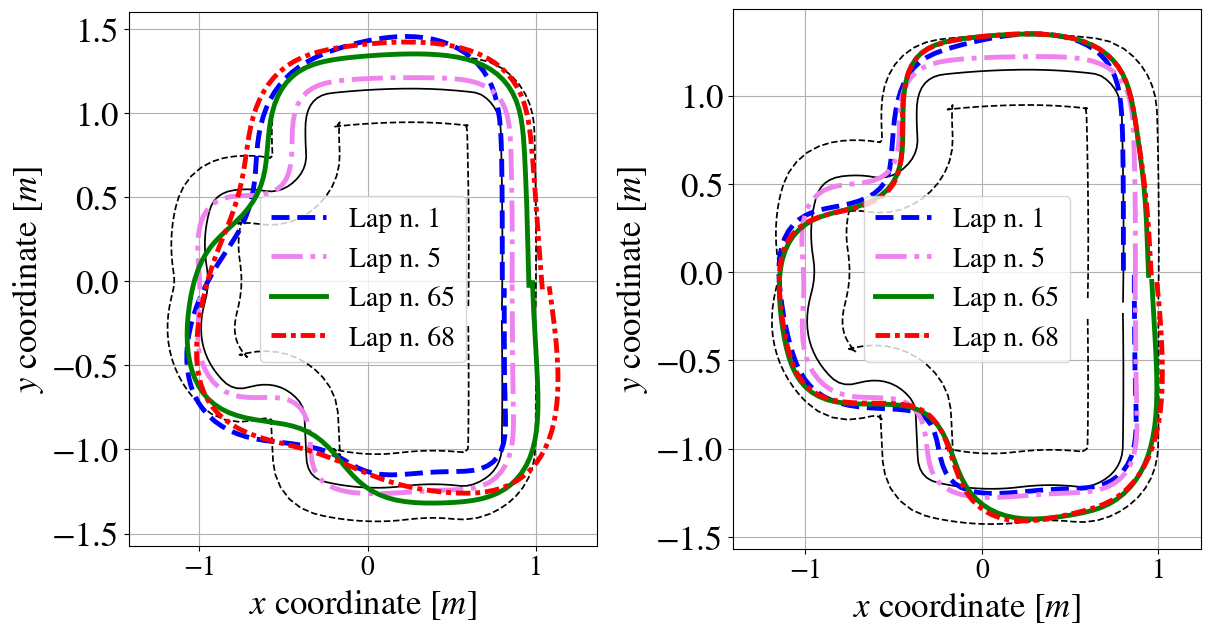

In [185]:
with open(r"vars/trajectory.pickle", "rb") as handle:
    traj = pkl.load(handle)
with open(r"vars/inside.pickle", "rb") as handle:
    inside = pkl.load(handle)
with open(r"vars/outside.pickle", "rb") as handle:
    outside = pkl.load(handle)
    
fig, (ax1, ax2) = plt.subplots(1,2, dpi=100, figsize=(12,9))
ax1.plot(traj[:,0], traj[:,1], "k", lw=1.25)
ax1.plot(inside[:,0], inside[:,1], "k--", lw=1.25)
ax1.plot(outside[:,0], outside[:,1], "k--", lw=01.25)
ax2.plot(traj[:,0], traj[:,1], "k", lw=1.25)
ax2.plot(inside[:,0], inside[:,1], "k--", lw=1.25)
ax2.plot(outside[:,0], outside[:,1], "k--", lw=01.25)
#ax1.text(X_log[0,0], X_log[1,0], 'START')

for i, (key, val) in enumerate(logs_1.items()):
    #print(val[1].shape)
    #ax_dict["A"].plot(val[1][0,:], val[1][1,:], label='Lap n. %i'%(i+1))
    if i==0 or i==4 or i==64 or i==67:
        if i==0:
            c = 'b'
            linestyle = '--'
        elif i==4:
            c = 'violet'
            linestyle = '-.'
        elif i==64:
            c = 'green'
            linestyle = '-'
        elif i==67:
            c = 'r'
            linestyle = (0, (3, 1, 1, 1))
            #lw=2
        ax1.plot(val[1][0,:], val[1][1,:], color=c, linestyle=linestyle, lw=3.5, label='Lap n. %i'%(i+1))
        
for i, (key, val) in enumerate(logs_2.items()):
    #print(val[1].shape)
    #ax_dict["A"].plot(val[1][0,:], val[1][1,:], label='Lap n. %i'%(i+1))
    if i==0 or i==4 or i==64 or i==67:
        if i==0:
            c = 'b'
            linestyle = '--'
        elif i==4:
            c = 'violet'
            linestyle = '-.'
        elif i==64:
            c = 'green'
            linestyle = '-'
        elif i==67:
            c = 'r'
            linestyle = (0, (3, 1, 1, 1))
            #lw=2
        ax2.plot(val[1][0,:], val[1][1,:], color=c, linestyle=linestyle, lw=3.5, label='Lap n. %i'%(i+1))
        

ax1.grid(True)
ax1.margins(x=0.1)
#plt.gca().set_aspect('equal')
#ax1.set_xlim(-1,5,1.5)
ax1.legend(fontsize=20)
ax1.set_aspect('equal')
ax1.set_xlabel('$x$ coordinate [$m$]')
ax1.set_ylabel('$y$ coordinate [$m$]')

#ax2.legend()
ax2.grid(True)
ax2.margins(x=0.1)
#ax2.set_xlim(-1,5,1.5)
ax2.legend(fontsize=20)
ax2.set_aspect('equal')
ax2.set_xlabel('$x$ coordinate [$m$]')
ax2.set_ylabel('$y$ coordinate [$m$]')

plt.tight_layout(pad=0.5)
plt.grid(True)
#plt.savefig('1,05,5,2_training_laps_comparison.eps', format='eps')
plt.show()